In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\Aditya Deshmukh\OneDrive\Desktop\df science\Diabetes-Deployment-With-BeanStalk-main (2)\Diabetes-Deployment-With-BeanStalk-main\dfset\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())


C:\Users\Aditya Deshmukh\AppData\Local\Temp\ipykernel_20444\2792008126.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(data=df.iloc[:,0:8]).set_xticklabels(df.columns,ha='right',rotation=45)


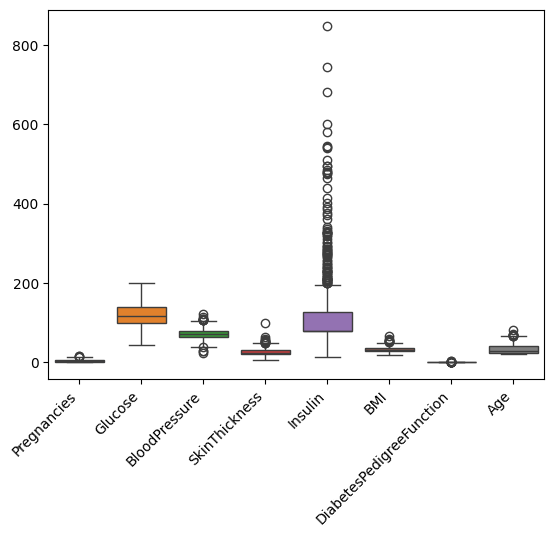

In [8]:
sns.boxplot(data=df.iloc[:,0:8]).set_xticklabels(df.columns,ha='right',rotation=45)
plt.show()

In [9]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,xtest.shape

((614, 8), (154, 8))

In [13]:
import pickle
sc=StandardScaler()
xtrainscaled=sc.fit_transform(xtrain)
xtestscaled=sc.transform(xtest)
file=open(r'C:\Users\Aditya Deshmukh\OneDrive\Desktop\data science\Diabetes-Deployment-With-BeanStalk-main (2)\Diabetes-Deployment-With-BeanStalk-main\Model\standard.pkl','wb')
pickle.dump(sc,file)
file.close()


In [14]:
xtrainscaled

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [15]:
xtestscaled

array([[ 0.68185612, -0.79260029, -1.16621189, ...,  0.23836693,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.32713796,  0.23821566, ...,  0.48367817,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.4601272 , -0.67053158, ..., -0.2233954 ,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.89234222, -0.00962449, ...,  0.64240897,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.80327055, -0.17485126, ..., -0.62743744,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.59053571, -0.17485126, ...,  0.42595788,
         0.70068816,  0.53008521]])

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [26]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
gscv=GridSearchCV(dtc,param_grid=parameter,scoring='accuracy',cv=3,verbose=3)
gscv.fit(xtrainscaled,ytrain)



Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.741 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.654 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, sco

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [27]:
gscv.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [43]:
dcsv1=DecisionTreeClassifier(criterion='log_loss',max_depth=4,max_features='log2',splitter='best')
dcsv1.fit(xtrainscaled,ytrain)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')

In [28]:
ypred=gscv.predict(xtestscaled)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        99
           1       0.53      0.60      0.56        55

    accuracy                           0.67       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154



In [31]:
accuracy_score(ytest,ypred)

0.6688311688311688

In [24]:
confusion_matrix(ytest,ypred)

array([[99,  0],
       [55,  0]], dtype=int64)

In [25]:
## Support Vector Classifier With Hyperparameter Tuning

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [33]:
svc=SVC()
gscv1=GridSearchCV(svc,param_grid=param_grid,scoring='accuracy',verbose=2,cv=3)
gscv1.fit(xtrainscaled,ytrain)


Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=1, kernel=polynomial; total time=   0.0s
[CV] END ..................C=0.1, gamma=1, kernel=polynomial; total time=   0.0s
[CV] END ..................C=0.1, gamma=1, kernel=polynomial; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=2)

In [34]:
gscv1.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [37]:
ypred1=gscv1.predict(xtestscaled)

In [38]:
accuracy_score(ytest,ypred1)

0.7597402597402597

In [39]:
confusion_matrix(ytest,ypred1)

array([[82, 17],
       [20, 35]], dtype=int64)

precion for svc


In [40]:
82/(17+82)

0.8282828282828283

precion for dtree

In [41]:
99/99+0

1.0

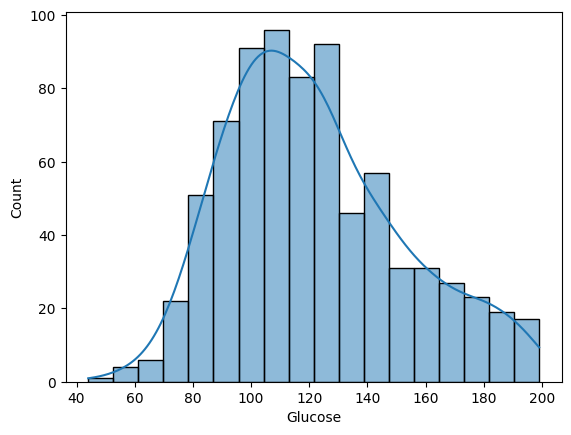

In [47]:
sns.histplot(df.iloc[:,1],kde=True)
plt.show()

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrainscaled,ytrain)

GaussianNB()

In [49]:
ypred2=gnb.predict(xtestscaled)

In [50]:
accuracy_score(ytest,ypred2)

0.7532467532467533

In [51]:
confusion_matrix(ytest,ypred2)

array([[78, 21],
       [17, 38]], dtype=int64)

preciosion for naive bayes

In [52]:
78/(78+21)

0.7878787878787878

In [44]:
file=open(r'C:\Users\Aditya Deshmukh\OneDrive\Desktop\data science\Diabetes-Deployment-With-BeanStalk-main (2)\Diabetes-Deployment-With-BeanStalk-main\Model\model.pkl','wb')
pickle.dump(dcsv1,file)
file.close()